# EDA

In [1]:
# import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
# import matplotlib.pylab as pl
# matplotlib.rcParams['figure.figsize']=(12,6)

In [24]:
g=list()
i1=1
i2=1
for _ in range(50):
    x=i2
    i2=i2+i1
    i1=x
    g.append(i2)

In [23]:
del g
2,3,5,7,11,13,17,19,23,29,31

In [28]:
# sn.lineplot(x=(i for i in range(len(g))),y=[True if i%2==0 else False for i in g])

In [1]:
import itertools as it
{i for i in it.combinations(["1E","2S","2A","1P",None,None],4)}

{('1E', '1P', None, None),
 ('1E', '2A', '1P', None),
 ('1E', '2A', None, None),
 ('1E', '2S', '1P', None),
 ('1E', '2S', '2A', '1P'),
 ('1E', '2S', '2A', None),
 ('1E', '2S', None, None),
 ('2A', '1P', None, None),
 ('2S', '1P', None, None),
 ('2S', '2A', '1P', None),
 ('2S', '2A', None, None)}

In [2]:
df=pd.read_csv("data/Zomatodataset/zomato.csv",encoding="latin-1")

In [3]:
df.to_csv("data/Zomatodataset/zomato2.csv")

In [20]:
pd.set_option('display.max_columns',30)

In [2]:
df=pd.read_csv("data/Zomatodataset/zomato.csv")

In [3]:
df.shape

(9552, 22)

In [4]:
for i,d in df.iteritems():
    print(i,d.nunique())

Unnamed: 0 9552
Restaurant ID 9552
Restaurant Name 7447
Country Code 16
City 142
Address 8919
Locality 1208
Locality Verbose 1265
Longitude 8120
Latitude 8677
Cuisines 1826
Average Cost for two 140
Currency 13
Has Table booking 3
Has Online delivery 3
Is delivering now 3
Switch to order menu 2
Price range 4
Aggregate rating 33
Rating color 6
Rating text 6
Votes 1012


In [13]:
c=df.Average_Cost_for_two.value_counts()
bb=c[c>45]

In [19]:
len(bb)

31

In [15]:
# fresh binning
def all_freq_10(x):
    N = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
    C = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
    x_min, x_max = np.min(x), np.max(x)
    D = (x_max-x_min)/N 
    for i in range(np.size(N)):
        n = N[i]+1
        edges = np.linspace(x_min,x_max,n)
        ki = [ x.between(edges[i-1],edges[i]).sum() for i in range(n) if i != 0 and i != n ]
        k = np.mean(ki)
        v = np.sum((ki-k)**2)/(n-1)
        C[i] = (2*k-v)/((D[i])**2)

    cmin = np.min(C)
    idx  = np.where(C == cmin)[0][0]
    return idx

In [37]:
fff=df.Average_Cost_for_two.value_counts(normalize=True)
th=fff[(fff.cumsum() > 0.1).idxmax()]
gg=df.Average_Cost_for_two.mask(df.Average_Cost_for_two.map(df.Average_Cost_for_two.value_counts(normalize=True)) < 0.005 ,'other').value_counts()
gg.sort_index()

10       128
100      353
1000     281
1100      80
1200     145
1300      68
1400      78
150      367
1500     190
1600      78
1800      68
200      687
2000     110
25       174
250      461
2500      54
300      897
350      457
40       115
400      857
450      335
50        55
500      900
550      183
600      652
650      177
700      403
750       68
800      347
850       55
900      109
other    619
Name: Average_Cost_for_two, dtype: int64

In [36]:
df.Average_Cost_for_two.nunique()

140

In [46]:
sn.histplot(df.Average_Cost_for_two)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'numpy.dtype[object_]'

In [ ]:
def real_numbers_of_category():
    

In [32]:
c1=df.Currency.value_counts()
# c1[c1 > c1.max()*0.05]
c1[ c1 <= c1.max()*0.05 ]

Pounds(£)                80
Brazilian Real(R$)        60
Emirati Diram(AED)        60
Rand(R)                   60
NewZealand($)             40
Turkish Lira(TL)          34
Botswana Pula(P)          22
Indonesian Rupiah(IDR)    21
Qatari Rial(QR)           20
Sri Lankan Rupee(LKR)     20
4                          1
Name: Currency, dtype: int64

In [18]:
all_freq_10(bb)

5

<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='Count'>

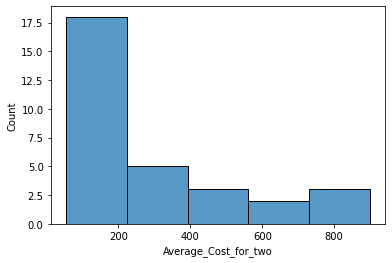

In [20]:
sn.histplot(bb,bins=5)

/home/kar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average_Cost_for_two'>

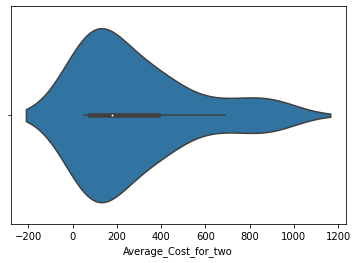

In [25]:
sn.violinplot(bb)

In [4]:
df.columns=df.columns.str.replace("[^A-Za-z]| ","_")

/tmp/ipykernel_12455/3243948675.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns=df.columns.str.replace("[^A-Za-z]| ","_")


In [32]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed___            9552 non-null   object 
 1   Restaurant_ID         9552 non-null   object 
 2   Restaurant_Name       9552 non-null   object 
 3   Country_Code          9552 non-null   float64
 4   City                  9552 non-null   object 
 5   Address               9552 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality_Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   object 
 9   Latitude              9551 non-null   object 
 10  Cuisines              9542 non-null   object 
 11  Average_Cost_for_two  9551 non-null   object 
 12  Currency              9551 non-null   object 
 13  Has_Table_booking     9551 non-null   object 
 14  Has_Online_delivery   9551 non-null   object 
 15  Is_delivering_now    

In [6]:
dff=pd.read_excel("data/Zomatodataset/Country-Code.xlsx")

In [7]:
dff

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
dd=pd.merge(df,dff,on="Country Code",how="left")

In [9]:
dd.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
dd.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [11]:
x=dd.Country.value_counts().values
y=dd.Country.value_counts().index

<AxesSubplot:>

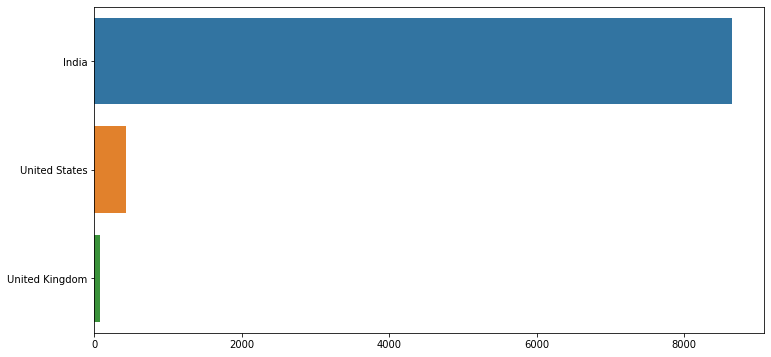

In [12]:
sn.barplot(x=x[:3],y=y[:3])

([<matplotlib.patches.Wedge at 0x7f76a2c6b130>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

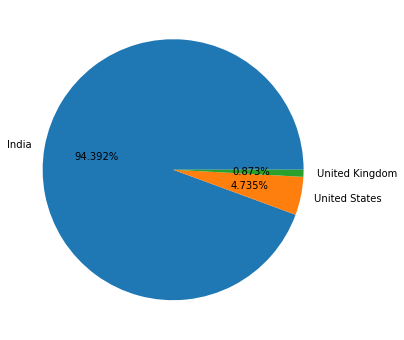

In [13]:
pl.pie(x=x[:3],labels=y[:3],autopct='%1.3f%%')

<BarContainer object of 3 artists>

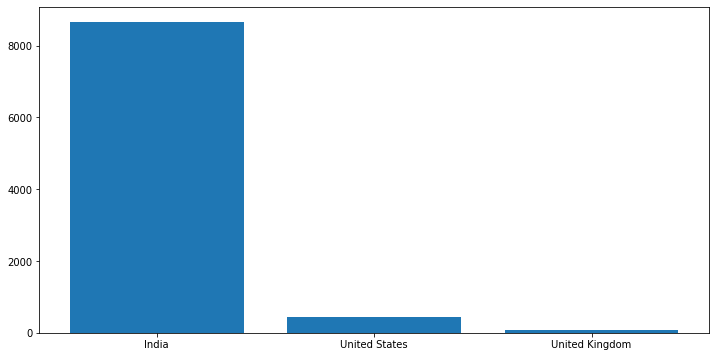

In [14]:
pl.bar(y[:3],height=x[:3])

In [15]:
dd.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [16]:
xx=dd.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating_count'})

In [17]:
xx

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating_count'>

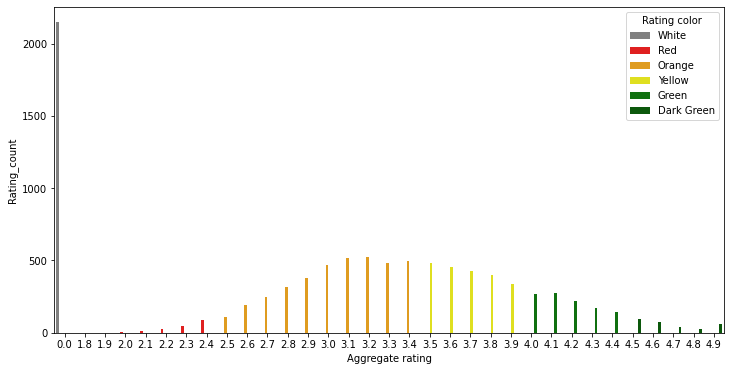

In [18]:
sn.barplot(y=xx.Rating_count,x=xx["Aggregate rating"],hue=xx['Rating color'],palette=['grey','red','orange','yellow','green','darkgreen'])

<AxesSubplot:xlabel='Rating color', ylabel='Rating_count'>

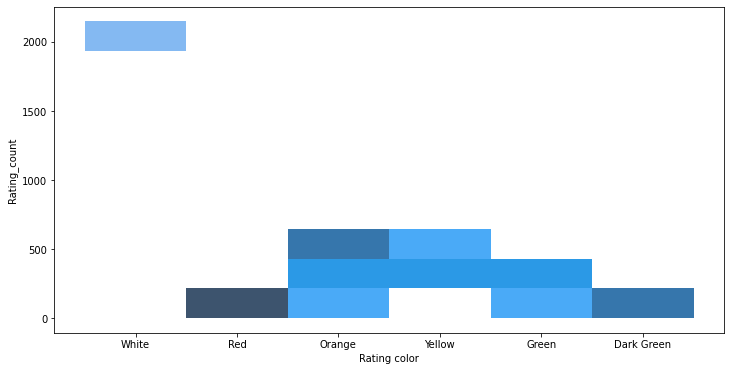

In [19]:
sn.histplot(x=xx["Rating color"],y=xx.Rating_count)

### orange is most rating recived

In [20]:
xc=dd.groupby(["Country",'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating_count'})

In [21]:
xc[xc["Rating text"] == "Not rated"]

,Country,Rating color,Rating text,Rating_count
8,Brazil,White,Not rated,5
17,India,White,Not rated,2139
58,United Kingdom,White,Not rated,1
64,United States,White,Not rated,3


In [22]:
pd.DataFrame(data=[dd.Currency,dd.Country]).transpose().drop_duplicates()

,Currency,Country
0,Botswana Pula(P),Phillipines
22,Brazilian Real(R$),Brazil
82,Dollar($),United States
102,Dollar($),Australia
185,Dollar($),Canada
456,Dollar($),Singapore
564,Emirati Diram(AED),UAE
624,Indian Rupees(Rs.),India
9276,Indonesian Rupiah(IDR),Indonesia
9297,NewZealand($),New Zealand


# start

In [23]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df.shape

(9551, 21)

In [25]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [27]:
df.select_dtypes(include="object").columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [28]:
df['Has Online delivery'].describe()

count     9551
unique       2
top         No
freq      7100
Name: Has Online delivery, dtype: object

In [29]:
for i in df:
     print(df[i].isnull().value_counts(),end='\n')


False    9551
Name: Restaurant ID, dtype: int64
False    9551
Name: Restaurant Name, dtype: int64
False    9551
Name: Country Code, dtype: int64
False    9551
Name: City, dtype: int64
False    9551
Name: Address, dtype: int64
False    9551
Name: Locality, dtype: int64
False    9551
Name: Locality Verbose, dtype: int64
False    9551
Name: Longitude, dtype: int64
False    9551
Name: Latitude, dtype: int64
False    9542
True        9
Name: Cuisines, dtype: int64
False    9551
Name: Average Cost for two, dtype: int64
False    9551
Name: Currency, dtype: int64
False    9551
Name: Has Table booking, dtype: int64
False    9551
Name: Has Online delivery, dtype: int64
False    9551
Name: Is delivering now, dtype: int64
False    9551
Name: Switch to order menu, dtype: int64
False    9551
Name: Price range, dtype: int64
False    9551
Name: Aggregate rating, dtype: int64
False    9551
Name: Rating color, dtype: int64
False    9551
Name: Rating text, dtype: int64
False    9551
Name: Votes, dtype: i

In [30]:
df.dropna(axis=0,inplace=True)

## low count of null data and that also can't be assigned 

In [31]:
for i in df:
     print(df[i].isnull().value_counts(),end='\n')

False    9542
Name: Restaurant ID, dtype: int64
False    9542
Name: Restaurant Name, dtype: int64
False    9542
Name: Country Code, dtype: int64
False    9542
Name: City, dtype: int64
False    9542
Name: Address, dtype: int64
False    9542
Name: Locality, dtype: int64
False    9542
Name: Locality Verbose, dtype: int64
False    9542
Name: Longitude, dtype: int64
False    9542
Name: Latitude, dtype: int64
False    9542
Name: Cuisines, dtype: int64
False    9542
Name: Average Cost for two, dtype: int64
False    9542
Name: Currency, dtype: int64
False    9542
Name: Has Table booking, dtype: int64
False    9542
Name: Has Online delivery, dtype: int64
False    9542
Name: Is delivering now, dtype: int64
False    9542
Name: Switch to order menu, dtype: int64
False    9542
Name: Price range, dtype: int64
False    9542
Name: Aggregate rating, dtype: int64
False    9542
Name: Rating color, dtype: int64
False    9542
Name: Rating text, dtype: int64
False    9542
Name: Votes, dtype: int64


In [32]:
df.select_dtypes(include="object").head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent


### these are the one hot encoding "Has Table booking","Has Online delivery","Is delivering now","Switch to order menu"

### these can be divided to other columns "Address","Locality","Locality Verbose"

In [33]:
df.select_dtypes(exclude="object").head().describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,5.000000e+00,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,6.310947e+06,162.0,121.042490,14.574065,1860.000000,3.600000,4.680000,353.80000
std,8.326152e+03,0.0,0.020349,0.013938,1209.545369,0.547723,0.216795,141.92498
min,6.300002e+06,162.0,121.014101,14.553708,1100.000000,3.000000,4.400000,229.00000
25%,6.304287e+06,162.0,121.027535,14.565443,1200.000000,3.000000,4.500000,270.00000
50%,6.314302e+06,162.0,121.056475,14.581404,1500.000000,4.000000,4.800000,314.00000
75%,6.317637e+06,162.0,121.056831,14.584450,1500.000000,4.000000,4.800000,365.00000
max,6.318506e+06,162.0,121.057508,14.585318,4000.000000,4.000000,4.900000,591.00000


In [34]:
df["Country Code"].value_counts()

1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [35]:
df["Price range"].value_counts()

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

In [36]:
df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
f=StandardScaler().fit_transform(df.loc[:,["Votes"]])
# sn.histplot(f)
# sn.boxenplot(f)
# sn.boxenplot(x=df["Votes"])


In [38]:
df.loc[:,"Votes"]

0        314
1        591
2        270
3        365
4        229
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 9542, dtype: int64

([<matplotlib.patches.Wedge at 0x7f76a203fee0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

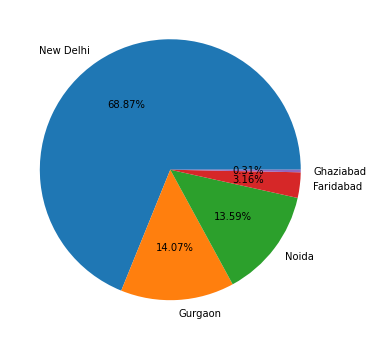

In [39]:
pl.pie(df.City.value_counts().values[:5],labels=df.City.value_counts().index[:5],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f76a2023730>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')],
 [Text(0.22777216858403795, 0.5550854341617375, '37.61%'),
  Text(-0.5946379025365549, 0.0800360223082493, '20.53%'),
  Text(-0.3450929640664576, -0.4908266966576152, '14.22%'),
  Text(0.16629622495663846, -0.5764942025425503, '14.22%'),
  Text(0.5474681611619538, -0.24551703100589356, '13.42%')])

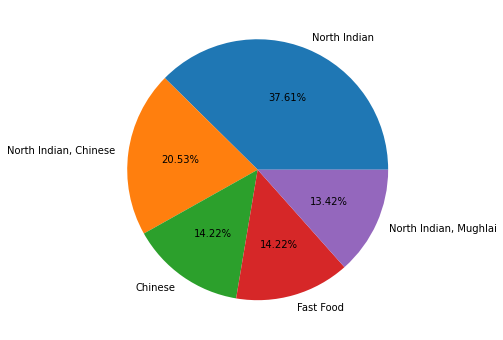

In [40]:
pl.pie(df.Cuisines.value_counts().values[:5],labels=df.Cuisines.value_counts().index[:5],autopct='%1.2f%%')

In [45]:
df.select_dtypes(exclude="object").head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229


In [56]:
df.columns=df.columns.str.replace(" ","_")

In [58]:
df.Average_Cost_for_two.value_counts(bins=10)

(-800.001, 80000.0]     9522
(160000.0, 240000.0]       7
(80000.0, 160000.0]        4
(240000.0, 320000.0]       4
(720000.0, 800000.0]       2
(320000.0, 400000.0]       1
(400000.0, 480000.0]       1
(480000.0, 560000.0]       1
(560000.0, 640000.0]       0
(640000.0, 720000.0]       0
Name: Average_Cost_for_two, dtype: int64

In [54]:
df.describe(exclude="object")

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [67]:
dff=df.sample(frac=0.25)

In [68]:
dff.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
8474,18427226,Anand Food Factory,1,Noida,"C-68, Sector-2, Noida",Sector 2,"Sector 2, Noida",77.314391,28.583783,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
8613,18265399,Kwality Walls - Happiness Station,1,Noida,"Third Floor, Food Court, Sector 38, Noida",Sector 38,"Sector 38, Noida",77.326363,28.567721,Ice Cream,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
9379,6114338,Flat Iron,215,London,"17 Beak Street, Soho, London W1F 9RW","Beak Street, Soho","Beak Street, Soho, London",-0.138343,51.512069,Steak,...,Pounds(£),No,No,No,No,2,4.9,Dark Green,Excellent,309
965,18445360,Hungrill,1,Faridabad,"Booth 110, HUDA Market, Near ICICI Bank, Secto...",Sector 16,"Sector 16, Faridabad",77.319076,28.410820,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,4
5452,2491,Hostess Tasty Bites,1,New Delhi,"F Block, Near Mother Dairy Booth, Ramlila Grou...",Model Town 2,"Model Town 2, New Delhi",77.190546,28.706519,Chinese,...,Indian Rupees(Rs.),No,No,No,No,2,3.1,Orange,Average,16


In [69]:
dff.describe()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,9.224820e+06,17.479464,65.649647,25.627175,927.211232,1.799665,2.650754,149.738894
std,8.816723e+06,55.216500,39.295495,11.099486,8910.186505,0.903346,1.512908,427.693654
min,5.500000e+01,1.000000,-157.831538,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.024212e+05,1.000000,77.082179,28.476860,250.000000,1.000000,2.500000,4.000000
50%,6.403498e+06,1.000000,77.191764,28.569368,400.000000,2.000000,3.200000,31.000000
75%,1.835467e+07,1.000000,77.284576,28.642486,700.000000,2.000000,3.600000,127.750000
max,1.850065e+07,216.000000,174.793257,55.945950,300000.000000,4.000000,4.900000,9667.000000


In [70]:
dff.Country_Code.value_counts()

1      2175
216      93
214      18
189      17
215      15
148      14
191      10
30        9
208       8
14        6
162       6
184       6
166       4
94        4
37        1
Name: Country_Code, dtype: int64

In [103]:
# dff.where(dff.Country_Code == 1)

In [82]:
df.shape
df.dropna(inplace=True)

In [84]:
df.shape

(9542, 21)

In [89]:
dg=df.groupby(by="Country_Code")

In [101]:
dg.get_group(1).Aggregate_rating

624     3.9
625     3.5
626     3.6
627     4.0
628     4.2
       ... 
9271    3.6
9272    3.7
9273    4.3
9274    3.8
9275    4.4
Name: Aggregate_rating, Length: 8652, dtype: float64

In [102]:
np.average(dg.get_group(1).Aggregate_rating)

2.52332408691632

In [117]:
dg.get_group(1).Price_range.mode()

0    1
Name: Price_range, dtype: int64

In [126]:
dg.get_group(37).index

Int64Index([185, 208, 540, 563], dtype='int64')

In [201]:
dg.get_group(1)
# .loc[:,["Average_Cost_for_two","Price_range","Aggregate_rating"]]

Restaurant_ID                                                    18500652
Restaurant_Name                                      {Niche} - Cafe & Bar
Country_Code                                                            1
City                                                                Vizag
Address                 ibis New Delhi, Asset 9, Hospitality District,...
Locality                                         ibis New Delhi, Aerocity
Locality_Verbose                      ibis New Delhi, Aerocity, New Delhi
Longitude                                                       91.806493
Latitude                                                             35.0
Cuisines                                                       Vietnamese
Average_Cost_for_two                                                 8000
Currency                                               Indian Rupees(Rs.)
Has_Table_booking                                                     Yes
Has_Online_delivery                   

In [141]:
dg.size()
# .mad()

Country_Code
1      8652
14       24
30       60
37        4
94       21
148      40
162      22
166      20
184      20
189      60
191      20
208      34
214      60
215      80
216     425
dtype: int64

In [142]:
dg.sem() # standard error mean

,Restaurant_ID,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
Country_Code,,,,,,,
1,9.632133e+04,0.193703,0.075004,6.404009,0.009166,0.016244,4.601777
14,8.390170e+04,1.959445,1.090183,4.418307,0.151233,0.106818,23.403047
30,4.017984e+04,0.258523,0.458918,11.209904,0.106829,0.161787,2.264076
37,5.105133e+03,7.669794,2.555593,11.250000,0.500000,0.280995,50.718176
94,1.191953e+06,5.088021,0.301774,44416.728887,0.047619,0.093472,135.328452
148,5.977125e+05,0.004279,1.039177,5.980604,0.141195,0.068471,28.216982
162,1.000969e+06,0.007160,0.029238,270.447270,0.123888,0.073675,50.546394
166,1.350902e+06,0.009064,0.006719,33.072637,0.131289,0.093584,21.447807
184,8.732715e+02,0.003403,0.003011,32.622794,0.131289,0.087321,0.606543


In [168]:
dg.get_group(1).quantile(q=0.5)

Restaurant_ID           2.200006e+06
Country_Code            1.000000e+00
Longitude               7.720347e+01
Latitude                2.856987e+01
Average_Cost_for_two    4.500000e+02
Price_range             2.000000e+00
Aggregate_rating        3.100000e+00
Votes                   2.400000e+01
Name: 0.5, dtype: float64

In [184]:
dg.expanding().max() # unknown 
dg.ewm().max() # unknown 

In [ ]:
d=pd.read_csv("data/archive/train.csv")

In [ ]:
d.shape

In [ ]:
d.describe()

In [ ]:
d.info()

## taget Purchase

In [ ]:
dtest=pd.read_csv("data/archive/test.csv")

In [ ]:
d.Gender.value_counts(normalize=True)

In [ ]:
d=pd.concat([d,dtest])

In [ ]:
d.Gender=d.Gender.map({'F':0,'M':1})

In [ ]:
d

In [ ]:
d=pd.concat([d,pd.get_dummies(d.City_Category,drop_first=True)],axis=1)

In [ ]:
d.Age=d.Age.map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [ ]:
d.Age.unique()

In [ ]:
d.Age.value_counts(ascending=True)

In [ ]:
d

In [ ]:
d.drop(labels=["User_ID","City_Category"],inplace=True,axis=1)

In [ ]:
d.columns=d.columns

In [ ]:
d.columns

In [ ]:
d

In [ ]:
d.isnull().sum()

In [ ]:
d["Product_Category_1"]=d["Product_Category_1"].fillna(d["Product_Category_1"].mode()[0])

In [ ]:
d["Product_Category_2"]=d["Product_Category_2"].fillna(d["Product_Category_2"].mode()[0])
d["Product_Category_3"]=d["Product_Category_3"].fillna(d["Product_Category_3"].mode()[0])

In [ ]:
d.isnull().sum()

In [ ]:
d.Stay_In_Current_City_Years.unique()

In [ ]:
d.Stay_In_Current_City_Years=d.Stay_In_Current_City_Years.str.replace("+",' ')

In [ ]:
d.Stay_In_Current_City_Years=d.Stay_In_Current_City_Years.astype('int8')

In [ ]:
d.B=d.B.astype('int8')
d.C=d.C.astype('int8')

In [ ]:
d.info()

In [ ]:
# sn.pairplot(d.drop(columns=["Product_ID"]))
# d.Product_ID
sn.heatmap(d.corr())